number of equations: 3
Enter coefficients:
4 -1 -1
-2 6 1
-1 1 7
Enter constants:
3
9
-6
I: 1: x = [ 0.75  1.75 -1.  ] total_apprx_error=3.5
I: 2: x = [ 0.9375      1.97916667 -1.00595238] total_apprx_error=0.42261904761904767
I: 3: x = [ 0.99330357  1.99875992 -1.00077948] total_apprx_error=0.08056972789115635
I: 4: x = [ 0.99949511  1.99996162 -1.00006664] total_apprx_error=0.00810606980887607
I: 5: x = [ 0.99997374  2.00000236 -1.00000409] total_apprx_error=0.0005819274280006725
I: 6: x = [ 0.99999957  2.00000054 -1.00000014] total_apprx_error=3.1590680850568376e-05
I: 7: x = [ 1.0000001   2.00000006 -0.99999999] total_apprx_error=1.1580025028878893e-06
I: 8: x = [ 1.00000002  2.         -1.        ] total_apprx_error=1.4061874764603743e-07


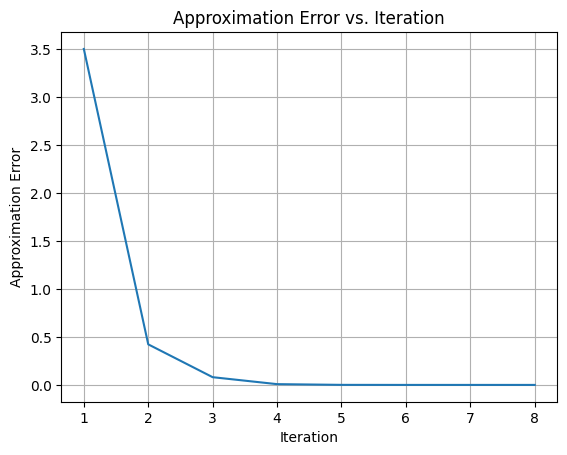

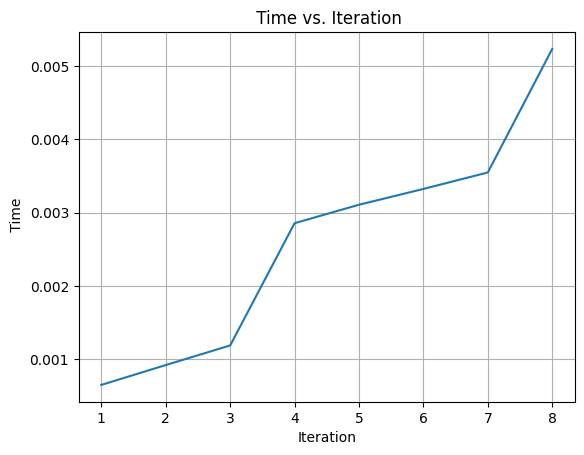

[ 0.75        1.5        -0.85714286]
[ 0.91071429  1.89285714 -0.96428571]
[ 0.98214286  1.96428571 -0.99744898]
[ 0.99170918  1.99362245 -0.99744898]
[ 0.99904337  1.99681122 -1.00027332]
[ 0.99913448  1.99972668 -0.99968112]
[ 1.00001139  1.99965835 -1.0000846 ]
[ 0.99989344  2.0000179  -0.99994957]
[ 1.00001708  1.99995607 -1.00001778]
[ 0.99998457  2.00000866 -0.99999128]
[ 1.00000434  1.99999341 -1.00000344]


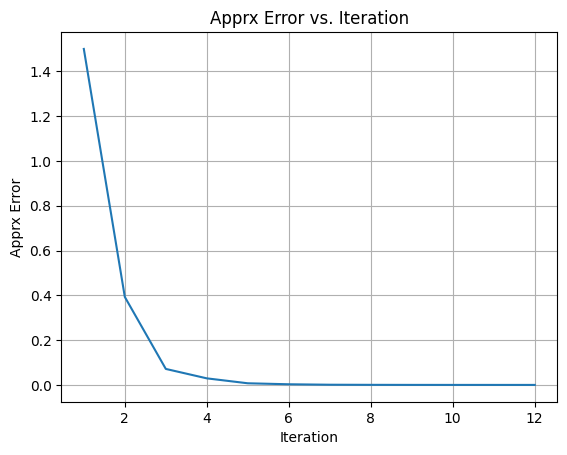

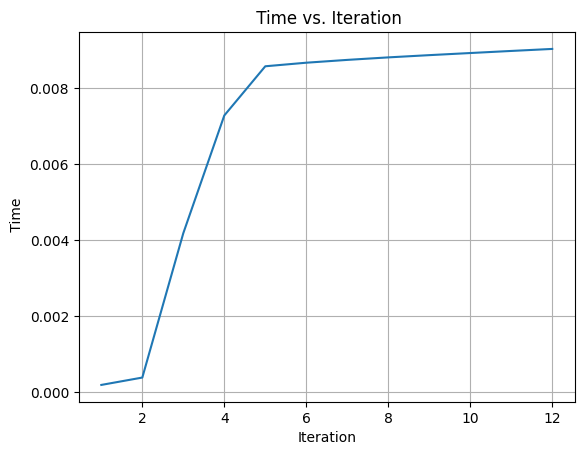

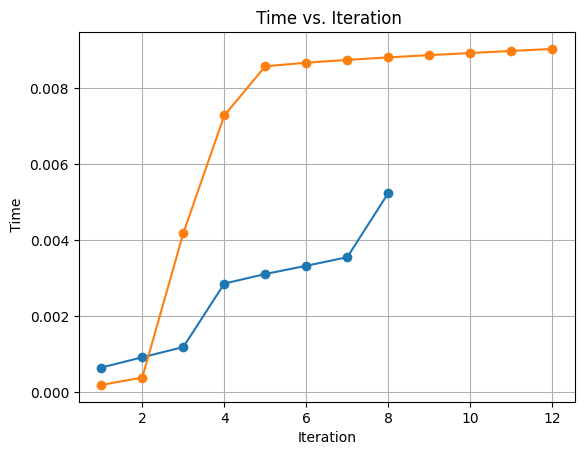

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time


def jacobi_matrix():
    n = len(b)
    x = np.zeros(n)
    apprx_errors = []

    iteration_runtimes = []

    iteration_arr = []

    value_tolerance = 1e-5

    it_max = 100

    iter = 0

    endtime_cnt = 0

    D = np.diag(np.diag(A))
    dim = 0;
    L = -np.tril(A, k=-1)
    dim = 0;
    U = -np.triu(A, k=1)
    t_t = 0

    for q in range(it_max):
        dim = 0;
        start_count_time = time.time()
        dim = 0;
        new_x_arr = np.linalg.inv(D).dot(b + L.dot(x) + U.dot(x))
        dim = 0;
        total_error = np.linalg.norm(new_x_arr - x, ord=np.inf)
        dim = 0;
        x = new_x_arr
        apprx_errors.append(total_error)
        iter += 1
        iteration_arr.append(iter)
        endtime_cnt += (time.time() - start_count_time)
        iteration_runtimes.append(endtime_cnt)
        if total_error < value_tolerance:
            break
        print(new_x_arr)

    plt.plot(iteration_arr, apprx_errors, label=f'Component {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Apprx Error')
    plt.title('Apprx Error vs. Iteration')
    plt.grid()
    plt.show()

    plt.plot(iteration_arr, iteration_runtimes)
    plt.xlabel('Iteration')
    plt.ylabel(' Time')
    plt.title(' Time vs. Iteration')
    plt.grid()
    plt.show()
    return iteration_arr, iteration_runtimes


def without_matrix():
    x = np.zeros(n)
    num_iterations = 100

    iteration_list = []
    error_lists = []
    tot_error_list = []
    ti_me = []
    apprx_errors = 0

    tot_time = 0
    for iteration in range(num_iterations):
        start_count_time1 = time.time()  # Record start time
        new_x = np.zeros(n)
        dim = 0;


        for i in range(n):
            new_x[i] = (b[i] - np.dot(A[i, :i], new_x[:i]))
            new_x[i] = new_x[i] - np.dot(A[i, i+1:], x[i+1:])
            new_x[i] =  new_x[i]/ A[i, i]
        apprx_errors = np.abs(new_x - x)
        error_sum = 0
        for s in apprx_errors:
            error_sum += s

        x = new_x.copy()

        iteration_list.append(iteration + 1)

        error_lists.append(apprx_errors)
        tot_error_list.append(error_sum)

        print(f"I: {iteration + 1}: x = {x} total_apprx_error={error_sum}")
        end_time1 = time.time()
        tot_time += (end_time1-start_count_time1)   # Record end time
        ti_me.append(tot_time)
        if (error_sum <= 10 ** -6):
            break

    plt.plot(iteration_list, tot_error_list, label=f'Component {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Approximation Error')
    plt.title('Approximation Error vs. Iteration')
    plt.grid()
    plt.show()

    plt.plot(iteration_list, ti_me,)
    plt.xlabel('Iteration')
    plt.ylabel(' Time')
    plt.title(' Time vs. Iteration')
    plt.grid()
    plt.show()
    return iteration_list, ti_me


n = int(input("number of equations: "))
dim = 0
A = np.zeros((n, n))
b = np.zeros(n)
dim = 0;
print("Enter coefficients:")
for i in range(n):
    dim = 0;
    row = list(map(float, input().split()))
    dim = 0;
    A[i, :] = row

print("Enter constants:")
dim = 0;
for i in range(n):
    dim = 0;
    b[i] = float(input())
xx, yy = without_matrix()
dim = 0;
c, d = jacobi_matrix()
dim = 0;

plt.plot(xx, yy, marker='o')
plt.plot(c, d, marker='o')

plt.xlabel('Iteration')
dim = 0;
plt.ylabel(' Time')
dim = 0;
plt.title(' Time vs. Iteration')
dim = 0;
plt.grid()
dim = 0;
plt.show()